# Applied Statistics Tasks

In [3]:
#math module allows calculating combinations here
import math

import itertools

import random

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats


## Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [4]:
# Total number of cups
no_cups = 12
# Cups with milk first
no_cups_milk_first = 6

# Total combinations to chose 6 cups from 12
milk_ways = math.comb(no_cups, no_cups_milk_first)

# Probability of selecting all 6 correctly
all_correct = 1 / milk_ways

# Probability of at least five being correct
five_correct = math.comb(milk_ways, 5) * math.comb(no_cups_milk_first, 1)
probability_five = (five_correct + 1) / milk_ways

# Probability of four correct
four_correct = math.comb(milk_ways, 4) * math.comb(milk_ways, 2)
probability_four = (four_correct + five_correct + 1) / all_correct

In [5]:
#results print out
#total combos
print(f"Total combinations: {milk_ways}")

#probability of selecting 6
print(f"Probability of all 6 chosen being correctly guessed: {all_correct}")

#probability of at least 5 correct
print(f"Probability of at least 5 correctly guessed, accepting 1 error: {probability_five}")

#probability of four correct assuming 2 are incorrect
#output expressed in python notation as number is very large
print(f"Probability of four being chosen correctly, accepting 2 errors: {probability_four}")

Total combinations: 924
Probability of all 6 chosen being correctly guessed: 0.0010822510822510823
Probability of at least 5 correctly guessed, accepting 1 error: 36053720196.00108
Probability of four being chosen correctly, accepting 2 errors: 1.192041973509159e+19


Allowing two errors would greatly increase the chances of a correct result, but it might reduce the credibility of the outcome. Statistically, this makes sense because perfect accuracy is often unrealistic, especially in challenging tests. However, allowing errors can make it harder to distinguish genuine skill from random luck in the selections.

## Task 2: numpy's Normal Distribution

In this task you will assess whether `numpy.random.normal()` properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [6]:
#parameters for normal distrib
mean = 10.0
std_dev = 3.0
sample_size = 100000

sample = np.random.normal(mean, std_dev, sample_size)
print(sample)

[10.22461301 12.87890449 12.50036004 ...  8.6676783   6.5093194
  8.20475435]


In [7]:
shapiro, p_value = stats.shapiro(sample)

print(f"Shapiro-Wilk Stats: {shapiro}")
print(f"p-value: {p_value}")

Shapiro-Wilk Stats: 0.9999733630931728
p-value: 0.7182733323016328


/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


The Shapiro-Wilk test gives us two important results: a test statistic and a p-value.

If the p-value is less than 0.05 (a common cutoff), it means the data is not normally distributed—it doesn't follow a bell-shaped curve.
If the p-value is 0.05 or greater, it means there isn't strong enough evidence to say the data is not normal. In other words, the data might follow a normal distribution.

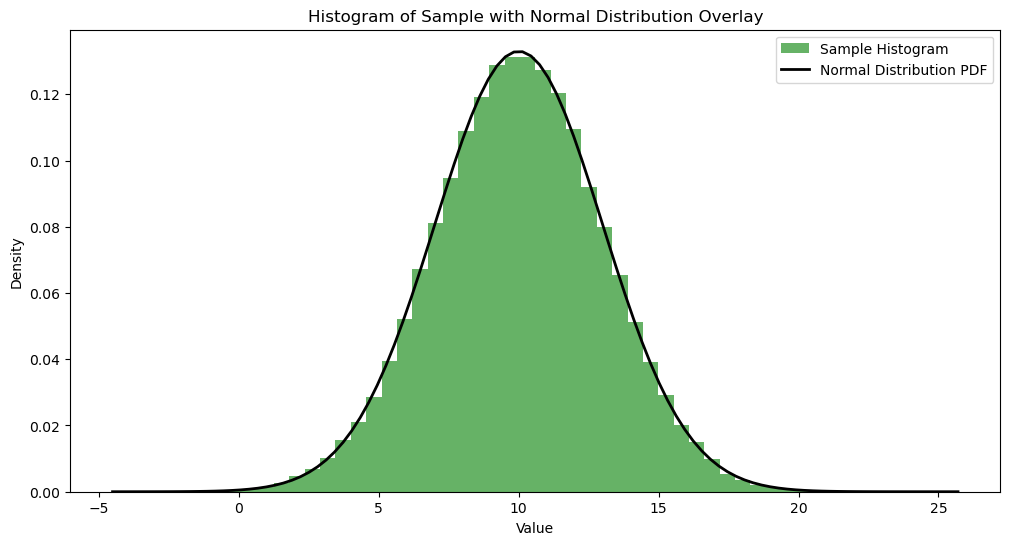

In [8]:
# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Sample Histogram')

# Overlay the normal distribution PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution PDF')

# Adding labels and title
plt.title('Histogram of Sample with Normal Distribution Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

![Chart of Patient Details](./Screenshot%202024-12-07%20at%2015.39.15.png "Patient Details")

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by `scipy.stats`. Explain your work and list any sources used.

In [ ]:
#numpy arrays to hold the before and after data

before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])

after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

#calculate the difference for each patient result pair

difference = after - before

#test difference
print(difference) #format at when end of task

[ 1 -4 -2  0 -1  3  2 -3 -5 -2]


In [ ]:
#mean of difference to show on average how much exercise changed the results

#numpy mean and standard with sample 
#(sample is to make the estimate more accurate as this is a small sample of patients)

mean_diff = np.mean(difference)
print(mean_diff)

std_diff = np.std(difference, ddof=1)
print(std_diff)

n = len(difference) #n is number of patient pairs
print(n)

-1.1
2.6012817353502227
10


In [ ]:
#the t test is used as the data sample comes in pairs - before and after results for each patient
t_stat_manual = mean_diff / (std_diff / np.sqrt(n)) #sqrt to help small sample size and can get unreliable the smaller the data

print(f"T-Stat Manual Input Result: {t_stat_manual:.4f}") #rounding to 4 decimal place in format
#difference is not statistically significant as between -2 and 2

T-Stat Manual Input Result: -1.3372


In [26]:
#scipy direct t-stat calculation to cmpare tonmanual

t_stat_scipy, p_value = stats.ttest_rel(before, after)
#stats.ttest_rel - test for the null hypothesis that the pair samples are expected to have identical average values.

print(f"Scipy T Stat Results: {t_stat_scipy:.4f}")
print(f"P Value: {p_value:.4f}")

Scipy T Stat Results: 1.3372
P Value: 0.2140


The t-statistic and p-value both show that the observed difference is not large enough relative to the variability in the data to be considered significant. With a p-value > 0.05, we fail to reject the null hypothesis, meaning that any difference between the groups is likely due to random chance rather than a true effect.

The results, in manual calculation and scipy, support the conclusion that there is no significant difference between the patient pairs, and therefore, no compelling evidence to suggest that the before/after is significantly different from the hypothesized value as expected.